In [ ]:
import tensorflow as tf

In [36]:
Exist_data=tf.keras.datasets.mnist

In [37]:
(x_train, y_train),(x_test, y_test)=Exist_data.load_data()

In [38]:
x_train.shape

(60000, 28, 28)

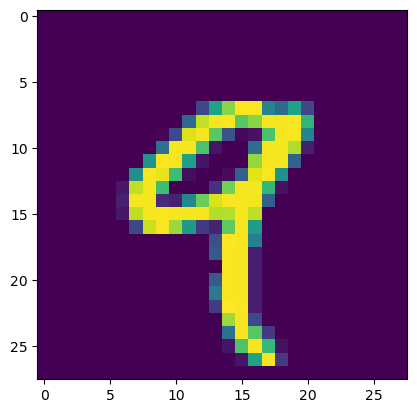

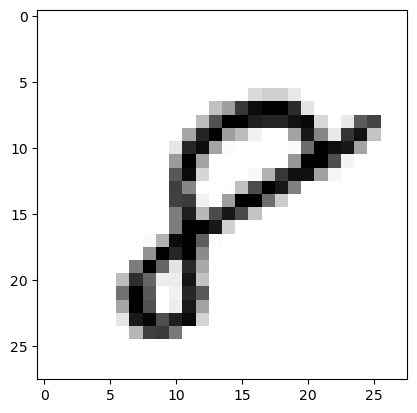

In [39]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4])
plt.show()

plt.imshow(x_train[-1],cmap=plt.cm.binary)

## Normalization:

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

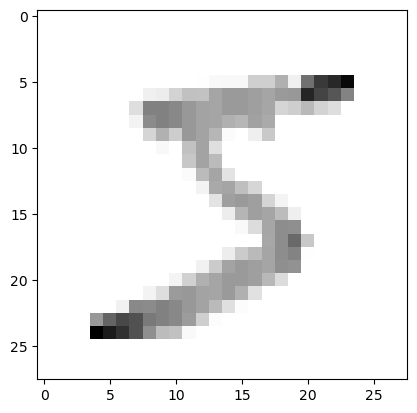

In [40]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)
print(x_train[0])
print(x_test[0])

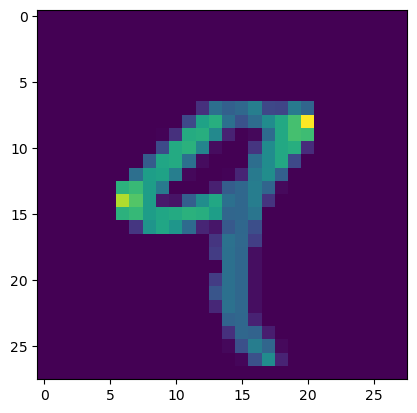

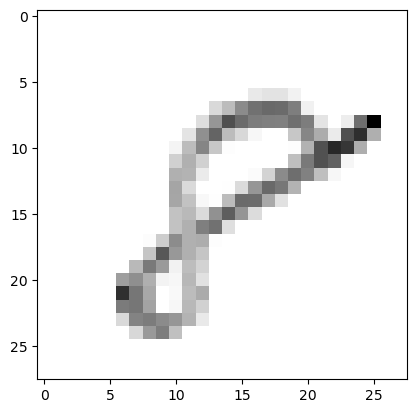

In [41]:
plt.imshow(x_train[4])
plt.show()

plt.imshow(x_train[-1],cmap=plt.cm.binary)

## Resizing

In [42]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
print("Training samples dim",x_train.shape)
print("Testing samples dim",x_test.shape)

Training samples dim (60000, 28, 28)
Testing samples dim (10000, 28, 28)


## Creating Deep Neural Network 

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

##creating now NN
model=Sequential()

#1st Convolution layer 
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd Convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully Connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

#Last Fully Connected layer #1
model.add(Dense(10))
model.add(Activation("softmax"))


NameError: name 'x_trainr' is not defined

In [45]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
print("Total Training samples =",len(x_trainr))

Total Training samples = 60000


In [52]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [53]:
#Train our model
model.fit(x_trainr,y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.7729 - loss: 0.6889 - val_accuracy: 0.9592 - val_loss: 0.1334
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9683 - loss: 0.1056 - val_accuracy: 0.9671 - val_loss: 0.1086
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.9757 - loss: 0.0771 - val_accuracy: 0.9696 - val_loss: 0.0969
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.9823 - loss: 0.0566 - val_accuracy: 0.9724 - val_loss: 0.0948
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9857 - loss: 0.0455 - val_accuracy: 0.9793 - val_loss: 0.0664


In [56]:
#
test_loss, test_arc=model.evaluate(x_testr, y_test)
print("test loss on 10000 test samples",test_loss)
print("Validation Accuracy on 10000 test samples", test_arc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9749 - loss: 0.0795
test loss on 10000 test samples 0.06529203802347183
Validation Accuracy on 10000 test samples 0.9800000190734863


In [58]:
#predict rather than save
prediction=model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [59]:
print(prediction)

[[1.13068296e-07 2.71383328e-06 1.62712186e-05 ... 9.99967337e-01
  1.47086905e-06 9.58027340e-06]
 [2.26319173e-07 2.42265628e-07 9.99999523e-01 ... 7.77084974e-09
  7.04360792e-09 1.20739641e-08]
 [4.87923273e-07 9.99923825e-01 4.59815283e-06 ... 6.50004658e-05
  8.41393160e-07 1.13671251e-06]
 ...
 [2.53595278e-09 5.82802068e-06 7.26549416e-08 ... 1.67848666e-05
  2.83597783e-05 1.60356372e-04]
 [2.91905917e-06 1.01189670e-08 1.22407695e-09 ... 2.77727423e-08
  6.58623976e-05 1.58049454e-06]
 [5.76480561e-05 1.16453884e-05 9.17785019e-06 ... 9.03301434e-09
  6.37524545e-06 2.06258255e-06]]


In [66]:
#convert pre
print(np.argmax(prediction[0]))

7


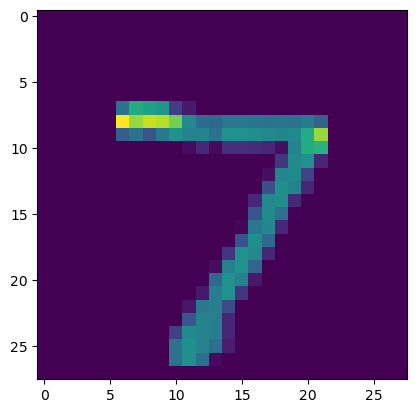

In [65]:
plt.imshow(x_test[0])

In [67]:
print(np.argmax(prediction[128]))
plt.imshow(x_test[128])

7


## creating DrawingAPP

In [79]:
# Create the drawing application
from tkinter import *
from PIL import Image, ImageDraw, ImageOps
class DrawingApp:
    def __init__(self, master):
        self.master = master
        self.canvas_size = 280  # Larger canvas for better drawing experience
        self.canvas = Canvas(master, width=self.canvas_size, height=self.canvas_size, bg='white')
        self.canvas.pack()
        
        self.image = Image.new("L", (self.canvas_size, self.canvas_size), 255)
        self.draw = ImageDraw.Draw(self.image)
        self.canvas.bind("<B1-Motion>", self.paint)
        
        self.label_result = Label(master, text="", font=("Helvetica", 16))
        self.label_result.pack()
        
        self.predict_after = 1000  # milliseconds
        self.after_id = None
        
    def paint(self, event):
        x1, y1 = (event.x - 5), (event.y - 5)
        x2, y2 = (event.x + 5), (event.y + 5)
        self.canvas.create_oval(x1, y1, x2, y2, fill="black", width=10)
        self.draw.line([x1, y1, x2, y2], fill="black", width=10)
        
        if self.after_id:
            self.master.after_cancel(self.after_id)
        self.after_id = self.master.after(self.predict_after, self.predict)
        
    def predict(self):
        img = self.image.resize((IMG_SIZE, IMG_SIZE)).convert('L')
        img = ImageOps.invert(img)  # Invert colors to match MNIST data
        img = np.array(img)
        img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1)
        img = tf.keras.utils.normalize(img, axis=1)
        
        prediction = model.predict([img])
        predicted_value = np.argmax(prediction)
        
        self.label_result.config(text="Predicted Value: " + str(predicted_value))
        
        self.image = Image.new("L", (self.canvas_size, self.canvas_size), 255)
        self.draw = ImageDraw.Draw(self.image)
        self.canvas.delete("all")

root = Tk()
app = DrawingApp(root)
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

## The END